In [2]:
# libraries
import pandas as pd
import numpy as np
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import scale
import warnings
warnings.filterwarnings('ignore')

In [3]:
digit = pd.read_csv("trainsvm.csv", nrows=15000)

In [3]:
#digit[digit.max()]
#xd=digit.drop(digit.max()==0, axis=1)

#digit = digit.loc[:, (digit.max()>0)]

In [4]:
digit.shape

(15000, 785)

In [5]:
# about the dataset

# dimensions
print("Dimensions: ", digit.shape, "\n")

# data types
print(digit.info())
#print(digit.isnull().sum().sort_values(ascending=False))

Dimensions:  (15000, 785) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Columns: 785 entries, label to pixel783
dtypes: int64(785)
memory usage: 89.8 MB
None


In [6]:
order= list(np.sort(digit['label'].unique()))
print(order)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]


## RBF SVM

In [7]:
# confusion matrix and accuracy
# linear model
x=digit.drop('label', axis=1)
y=digit['label']

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 101)


X_train=scale(X_train)
X_test=scale(X_test)


model_linear = SVC(kernel='rbf')
model_linear.fit(X_train, y_train)

# predict
y_pred = model_linear.predict(X_test)


# accuracy
print("accuracy:", metrics.accuracy_score(y_true=y_test, y_pred=y_pred), "\n")

# cm
print(metrics.confusion_matrix(y_true=y_test, y_pred=y_pred))

accuracy: 0.9391111111111111 

[[411   0   4   1   0   1   0   0   3   0]
 [  0 490   3   2   0   0   1   1   2   0]
 [  3   3 422   2   3   0   0   6   6   1]
 [  0   0  11 431   1   7   0   3   9   2]
 [  1   2  10   0 434   3   4   3   0  10]
 [  2   1   8  11   1 351   3   2   2   0]
 [  4   1   7   0   0   4 435   0   3   0]
 [  0   7  14   2   7   0   1 437   1  11]
 [  3   2   8   5   2   5   1   3 409   9]
 [  3   2   9   5   9   0   0   7   1 406]]


## Linear SVM

In [8]:
# confusion matrix and accuracy
# linear model
x=digit.drop('label', axis=1)
y=digit['label']

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 101)


X_train=scale(X_train)
X_test=scale(X_test)


model_linear = SVC(kernel='linear')
model_linear.fit(X_train, y_train)

# predict
y_pred = model_linear.predict(X_test)


# accuracy
print("accuracy:", metrics.accuracy_score(y_true=y_test, y_pred=y_pred), "\n")

# cm
print(metrics.confusion_matrix(y_true=y_test, y_pred=y_pred))

accuracy: 0.9104444444444444 

[[404   0   1   1   0   2   6   0   4   2]
 [  0 492   1   1   0   1   1   1   2   0]
 [  4   3 409   3   9   3   3   6   5   1]
 [  2   6  14 410   2  16   0   3   8   3]
 [  0   3   8   0 425   1   6   3   0  21]
 [  8   6   6  21   3 320   4   4   7   2]
 [  3   1  12   0   3   9 425   0   1   0]
 [  1   6   9   4  11   1   1 434   2  11]
 [  4   9  11  12   2  13   3   6 385   2]
 [  2   2   4   5  19   1   0  15   1 393]]


## Linear K-Fold

In [15]:
x=digit.drop('label', axis=1)
y=digit['label']


# creating a KFold object with 5 splits 
folds = KFold(n_splits = 3, shuffle = True, random_state = 44)

# specify range of hyperparameters
# Set the parameters by cross-validation
hyper_params = [ {'gamma': [1e-1,1e-2,1e-4,1e-6],'C': [1,10,100, 1000]}]

# specify model
model_linear = SVC(kernel="linear")

# set up GridSearchCV()
model_cv = GridSearchCV(estimator = model_linear, param_grid = hyper_params,scoring= 'accuracy',  cv = folds,  verbose = 1,
                        return_train_score=True)      

# fit the model
model_cv.fit(scale(x), y) 
cv_results = pd.DataFrame(model_cv.cv_results_)

Fitting 3 folds for each of 16 candidates, totalling 48 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  48 out of  48 | elapsed: 88.5min finished


In [17]:
# printing the optimal accuracy score and hyperparameters
best_score = model_cv.best_score_
best_hyperparams = model_cv.best_params_

print("The best test score is {0} corresponding to hyperparameters {1}".format(best_score, best_hyperparams))

The best test score is 0.9119333333333334 corresponding to hyperparameters {'C': 1, 'gamma': 0.1}


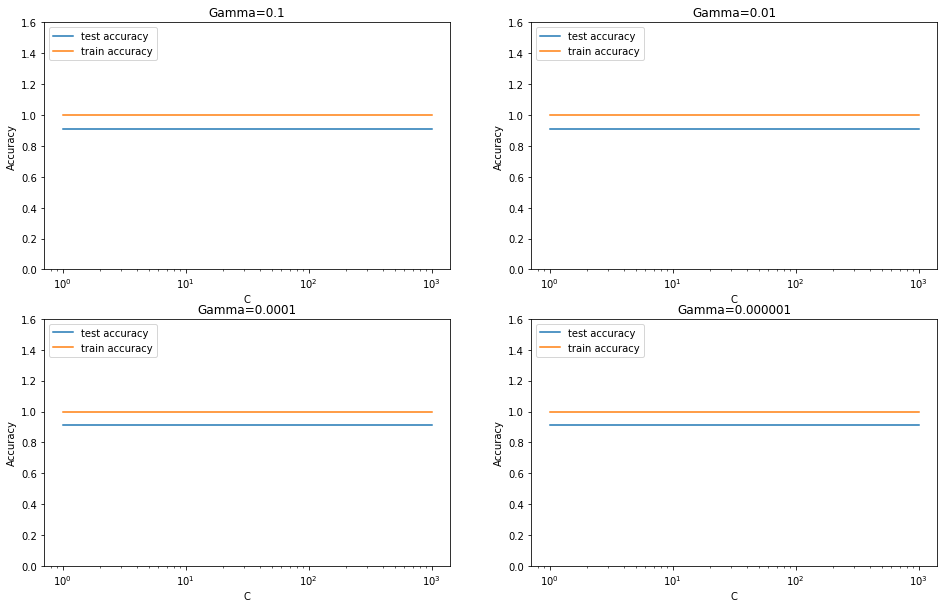

In [19]:
cv_results = pd.DataFrame(model_cv.cv_results_)

# converting C to numeric type for plotting on x-axis
cv_results['param_C'] = cv_results['param_C'].astype('int')

hyper_params =  [ {'gamma': [1e-1,1e-2,1e-4,1e-6],'C': [1,10,100, 1000]}]

# # plotting
plt.figure(figsize=(16,10))

# subplot 1/3
plt.subplot(221)
gamma_01 = cv_results[cv_results['param_gamma']==0.1]

plt.plot(gamma_01["param_C"], gamma_01["mean_test_score"])
plt.plot(gamma_01["param_C"], gamma_01["mean_train_score"])
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.title("Gamma=0.1")
plt.ylim([0, 1.6])
plt.legend(['test accuracy', 'train accuracy'], loc='upper left')
plt.xscale('log')

# subplot 2/3
plt.subplot(222)
gamma_001 = cv_results[cv_results['param_gamma']==0.01]

plt.plot(gamma_001["param_C"], gamma_001["mean_test_score"])
plt.plot(gamma_001["param_C"], gamma_001["mean_train_score"])
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.title("Gamma=0.01")
plt.ylim([0.0, 1.6])
plt.legend(['test accuracy', 'train accuracy'], loc='upper left')
plt.xscale('log')


# subplot 3/3
plt.subplot(223)
gamma_0001 = cv_results[cv_results['param_gamma']==0.0001]

plt.plot(gamma_0001["param_C"], gamma_0001["mean_test_score"])
plt.plot(gamma_0001["param_C"], gamma_0001["mean_train_score"])
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.title("Gamma=0.0001")
plt.ylim([0.0, 1.6])
plt.legend(['test accuracy', 'train accuracy'], loc='upper left')
plt.xscale('log')

plt.subplot(224)
gamma_0001 = cv_results[cv_results['param_gamma']==0.000001]

plt.plot(gamma_0001["param_C"], gamma_0001["mean_test_score"])
plt.plot(gamma_0001["param_C"], gamma_0001["mean_train_score"])
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.title("Gamma=0.000001")
plt.ylim([0.0, 1.6])
plt.legend(['test accuracy', 'train accuracy'], loc='upper left')
plt.xscale('log')


## RBF K-Fold

In [3]:
x=digit.drop('label', axis=1)
y=digit['label']


# creating a KFold object with 5 splits 
folds = KFold(n_splits = 5, shuffle = True, random_state = 44)

# specify range of hyperparameters
# Set the parameters by cross-validation
hyper_params =  [ {'gamma': [1e-1,1e-2,1e-3,1e-4,1e-5],'C': [1,10,100,1000]}]

# specify model
model_rbf = SVC(kernel="rbf")

# set up GridSearchCV()
model_cv = GridSearchCV(estimator = model_rbf, param_grid = hyper_params,scoring= 'accuracy',  cv = folds,  verbose = 1,
                        return_train_score=True)      

# fit the model
model_cv.fit(scale(x), y)

Fitting 4 folds for each of 9 candidates, totalling 36 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  36 out of  36 | elapsed: 285.0min finished


GridSearchCV(cv=KFold(n_splits=4, random_state=44, shuffle=True),
       error_score='raise-deprecating',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid=[{'gamma': [0.1, 0.001, 1e-06], 'C': [1, 100, 1000]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='accuracy', verbose=1)

In [4]:
cv_results = pd.DataFrame(model_cv.cv_results_)
#cv_results.head(5)

In [5]:
# printing the optimal accuracy score and hyperparameters
best_score = model_cv.best_score_
best_hyperparams = model_cv.best_params_

print("The best test score is {0} corresponding to hyperparameters {1}".format(best_score, best_hyperparams))

The best test score is 0.95 corresponding to hyperparameters {'C': 100, 'gamma': 0.001}


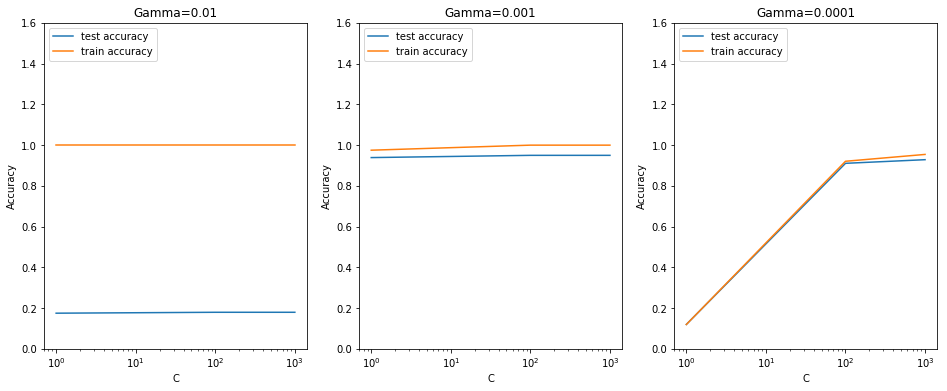

In [7]:
cv_results = pd.DataFrame(model_cv.cv_results_)

# converting C to numeric type for plotting on x-axis
cv_results['param_C'] = cv_results['param_C'].astype('int')

hyper_params = [ {'gamma':  [1e-1,1e-3,1e-6],'C': [1,100, 1000]}]

# # plotting
plt.figure(figsize=(16,6))

# subplot 1/3
plt.subplot(131)
gamma_01 = cv_results[cv_results['param_gamma']==0.1]

plt.plot(gamma_01["param_C"], gamma_01["mean_test_score"])
plt.plot(gamma_01["param_C"], gamma_01["mean_train_score"])
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.title("Gamma=0.01")
plt.ylim([0, 1.6])
plt.legend(['test accuracy', 'train accuracy'], loc='upper left')
plt.xscale('log')

# subplot 2/3
plt.subplot(132)
gamma_001 = cv_results[cv_results['param_gamma']==0.001]

plt.plot(gamma_001["param_C"], gamma_001["mean_test_score"])
plt.plot(gamma_001["param_C"], gamma_001["mean_train_score"])
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.title("Gamma=0.001")
plt.ylim([0.0, 1.6])
plt.legend(['test accuracy', 'train accuracy'], loc='upper left')
plt.xscale('log')


# subplot 3/3
plt.subplot(133)
gamma_0001 = cv_results[cv_results['param_gamma']==0.000001]

plt.plot(gamma_0001["param_C"], gamma_0001["mean_test_score"])
plt.plot(gamma_0001["param_C"], gamma_0001["mean_train_score"])
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.title("Gamma=0.0001")
plt.ylim([0.0, 1.6])
plt.legend(['test accuracy', 'train accuracy'], loc='upper left')
plt.xscale('log')


In [4]:
x=digit.drop('label', axis=1)
y=digit['label']


# creating a KFold object with 5 splits 
folds = KFold(n_splits = 5, shuffle = True, random_state = 44)

# specify range of hyperparameters
# Set the parameters by cross-validation
hyper_params =  [ {'gamma': [1e-1,1e-2,1e-3,1e-4,1e-5],'C': [1,10,100,1000]}]

# specify model
model_rbf = SVC(kernel="rbf")

# set up GridSearchCV()
model_cv = GridSearchCV(estimator = model_rbf, param_grid = hyper_params,scoring= 'accuracy',  cv = folds,  verbose = 1,
                        return_train_score=True)      

# fit the model
model_cv.fit(scale(x), y)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed: 541.0min finished


GridSearchCV(cv=KFold(n_splits=5, random_state=44, shuffle=True),
       error_score='raise-deprecating',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid=[{'gamma': [0.1, 0.01, 0.001, 0.0001, 1e-05], 'C': [1, 10, 100, 1000]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='accuracy', verbose=1)

In [8]:
cv_results = pd.DataFrame(model_cv.cv_results_)

In [9]:
# printing the optimal accuracy score and hyperparameters
best_score = model_cv.best_score_
best_hyperparams = model_cv.best_params_

print("The best test score is {0} corresponding to hyperparameters {1}".format(best_score, best_hyperparams))

The best test score is 0.9512 corresponding to hyperparameters {'C': 100, 'gamma': 0.001}


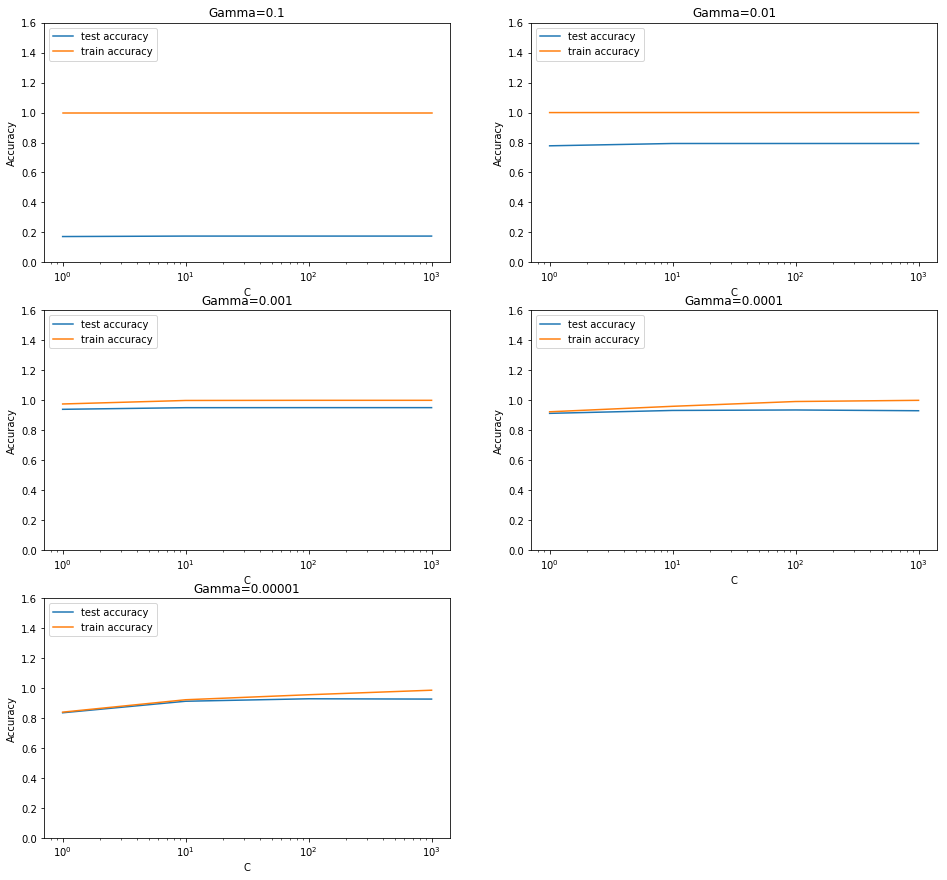

In [13]:
cv_results = pd.DataFrame(model_cv.cv_results_)

# converting C to numeric type for plotting on x-axis
cv_results['param_C'] = cv_results['param_C'].astype('int')

hyper_params = [ {'gamma':  [1e-1,1e-2,1e-3,1e-4,1e-5],'C': [1,10,100,1000]}]

# # plotting
plt.figure(figsize=(16,15))

# subplot 1/3
plt.subplot(321)
gamma_01 = cv_results[cv_results['param_gamma']==0.1]

plt.plot(gamma_01["param_C"], gamma_01["mean_test_score"])
plt.plot(gamma_01["param_C"], gamma_01["mean_train_score"])
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.title("Gamma=0.1")
plt.ylim([0, 1.6])
plt.legend(['test accuracy', 'train accuracy'], loc='upper left')
plt.xscale('log')

# subplot 2/3
plt.subplot(322)
gamma_001 = cv_results[cv_results['param_gamma']==0.01]

plt.plot(gamma_001["param_C"], gamma_001["mean_test_score"])
plt.plot(gamma_001["param_C"], gamma_001["mean_train_score"])
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.title("Gamma=0.01")
plt.ylim([0.0, 1.6])
plt.legend(['test accuracy', 'train accuracy'], loc='upper left')
plt.xscale('log')


# subplot 3/3
plt.subplot(323)
gamma_0001 = cv_results[cv_results['param_gamma']==0.001]

plt.plot(gamma_0001["param_C"], gamma_0001["mean_test_score"])
plt.plot(gamma_0001["param_C"], gamma_0001["mean_train_score"])
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.title("Gamma=0.001")
plt.ylim([0.0, 1.6])
plt.legend(['test accuracy', 'train accuracy'], loc='upper left')
plt.xscale('log')


plt.subplot(324)
gamma_0001 = cv_results[cv_results['param_gamma']==0.0001]

plt.plot(gamma_0001["param_C"], gamma_0001["mean_test_score"])
plt.plot(gamma_0001["param_C"], gamma_0001["mean_train_score"])
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.title("Gamma=0.0001")
plt.ylim([0.0, 1.6])
plt.legend(['test accuracy', 'train accuracy'], loc='upper left')
plt.xscale('log')


plt.subplot(325)
gamma_0001 = cv_results[cv_results['param_gamma']==0.00001]

plt.plot(gamma_0001["param_C"], gamma_0001["mean_test_score"])
plt.plot(gamma_0001["param_C"], gamma_0001["mean_train_score"])
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.title("Gamma=0.00001")
plt.ylim([0.0, 1.6])
plt.legend(['test accuracy', 'train accuracy'], loc='upper left')
plt.xscale('log')

In [14]:
xtest = pd.read_csv("testsvm.csv")

In [15]:
x=digit.drop('label', axis=1)
y=digit['label']

xtest=scale(xtest)

model_rbf = SVC(C=100, gamma=0.001, kernel="rbf")
model_rbf.fit(scale(x), y) 

SVC(C=100, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [16]:
# predict
y_pred_test = model_rbf.predict(xtest)
y_pred_test=pd.DataFrame(y_pred_test)
y_pred_test.to_csv('svm_assignment1.csv')

In [17]:
y_pred_test.head(5)

,0
0,2
1,0
2,9
3,4
4,3


## https://www.kaggle.com/c/digit-recognizer/leaderboard

### Kaggle Score

### Name  = Anil Sangwan   

### Score = 0.95385
